#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# About Features

1. **Employee ID**: A unique identifier for each employee. Usually a numeric or alphanumeric code.

2. **Name**: The full name of the employee. This might be split into first and last names in some datasets.

3. **Department**: The department or division within the organization where the employee works.

4. **Job Title**: The official title or position held by the employee in the organization.

5. **Salary**: The amount of money the employee earns. This could be represented as an annual salary, hourly wage, or monthly pay.

6. **Hire Date**: The date when the employee started working at the organization. Useful for calculating tenure or experience.

7. **Gender**: The gender of the employee. This might be included in some datasets for diversity and equality analysis.

8. **Years of Experience**: The total number of years the employee has worked in their field or profession.

9. **Education Level**: The highest level of education attained by the employee, such as a high school diploma, bachelor's degree, etc.

10. **Performance Rating**: If available, this could be a measure of the employee's performance in their role, often based on annual review scores.

11. **Location**: The geographical location or office where the employee works, if the organization has multiple locations.



# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

In [11]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [12]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [13]:
print("number of rows is:{} and the number of columns is:{}".format(df.shape[0],df.shape[1]))

number of rows is:148654 and the number of columns is:13


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [15]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [16]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,74327.500000,66325.448841,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


In [17]:
df['TotalPay'].describe()

count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64

In [18]:
salary_range = np.max(df['TotalPay']) - np.min(df['TotalPay'])
median_salary = np.median(df['TotalPay'])
mode = statistics.mode(df['TotalPay'])
print("Median Salary:", median_salary)
print("Mode Salary:", mode)
print("Salary Range:", salary_range)


Median Salary: 71426.60999999999
Mode Salary: 0.0
Salary Range: 568213.56


In [19]:
#del df['Notes']
df['OvertimePay'].fillna(0, inplace=True) 
df['OtherPay'].fillna(0, inplace=True) 
df['Benefits'].fillna(0, inplace=True)
df.head()
df.isnull().sum()



Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              0
OtherPay                 0
Benefits                 0
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

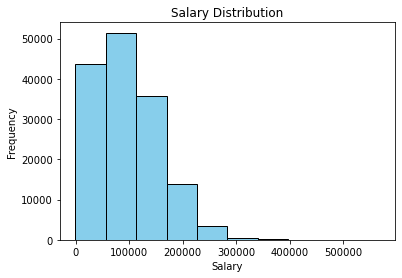

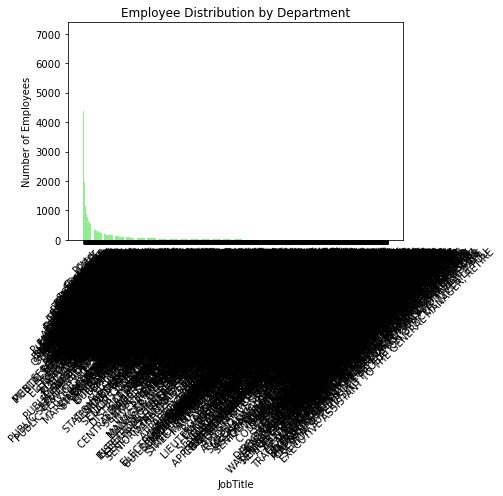

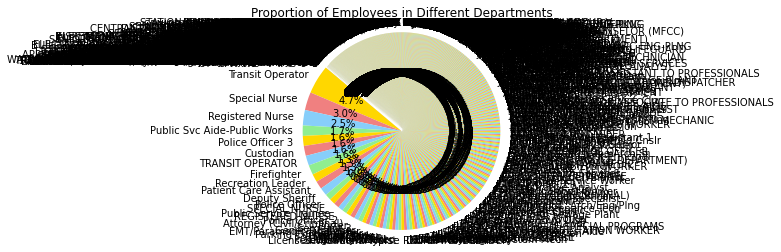

In [20]:
plt.hist(df['TotalPayBenefits'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Distribution')
plt.show()

# Create bar chart for department distribution
department_counts = df['JobTitle'].value_counts()
plt.bar(department_counts.index, department_counts.values, color='lightgreen')
plt.xlabel('JobTitle')
plt.ylabel('Number of Employees')
plt.title('Employee Distribution by Department')
plt.xticks(rotation=45)
plt.show()

# Create pie chart for proportion of employees in different departments
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=140, colors=['gold', 'lightcoral', 'lightskyblue', 'lightgreen'])
plt.axis('equal')
plt.title('Proportion of Employees in Different Departments')
plt.show()

In [22]:
data = pd.DataFrame(df)
# the average salary for each group
grouped_data = df.groupby('EmployeeName')['TotalPay'].mean()
print(grouped_data)

EmployeeName
A BERNARD FATOOH         20039.910
A Bernard  Fatooh        23923.620
A Bernard Fatooh         21280.770
A ELIZABETH MARCHASIN    26282.860
A JAMIL NIAZI            87496.210
                           ...    
Zun Jin Zhang He         57820.370
Zuna Luu                 52518.080
Zuna T Luu               56121.675
Zuri  Jones              71986.900
Zuri Jones               76628.030
Name: TotalPay, Length: 110811, dtype: float64


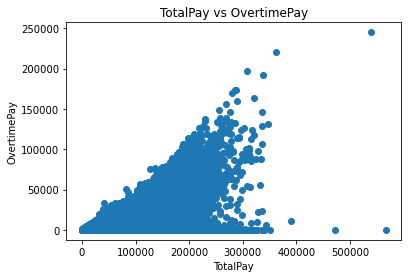

Correlation between salary and other column: 0.5048602762311214


In [23]:
correlation = data['TotalPay'].corr(data['OvertimePay'])

# Plot a scatter plot to visualize the relationship
plt.scatter(data['TotalPay'], data['OvertimePay'])
plt.title('TotalPay vs OvertimePay')
plt.xlabel('TotalPay')
plt.ylabel('OvertimePay')
plt.show()

print("Correlation between salary and other column:", correlation)

In [24]:
  # Write a brief report summarizing the findings and insights from the analyses
  #  :  سوف اضع هنا حل السؤال الأخير 
'''  
   
1. تم استخدام مكتبات pandas و numpy لقراءة وتحليل بيانات الرواتب.
2. تم فحص البيانات وتحليلها لفهمها بشكل أفضل، حيث تم طباعة عدد الصفوف والأعمدة ومعلومات حول الأنواع والقيم المفقودة.
3. تم حساب إحصائيات مختلفة مثل الراتب المتوسط، القيمة الأكثر تكراراً، ونطاق الرواتب.
4. تم معالجة القيم المفقودة في أعمدة 'OvertimePay'، 'OtherPay'، و 'Benefits' بملء القيم بصفر.
5. تم رسم histogram لتوزيع الرواتب وbar chart لتوزيع الموظفين حسب الوظائف.
6. تم رسم pie chart لتوزيع الموظفين حسب الأقسام.
7. تم حساب المتوسط الراتب لكل موظف ورسم scatter plot لرؤية العلاقة بين 'TotalPay' و 'OvertimePay'.
8. تم حساب الترابط بين 'TotalPay' و 'OvertimePay' وطباعة النتائج.

باستخدام هذه التحاليل والتصورات، يمكن للشركة أو المؤسسة استخلاص رؤى قيمة حول بيانات الرواتب وتوزيع الموظفين، مما يساعدها في اتخاذ قرارات استراتيجية وإدارية مستنيرة بما يخص الرواتب والموظفين اعتمادا على ما تم ذكره اعلاه .
'''

"  \n  تقرير موجز حول الاكتشافات والإدراك من التحليل:\n\n1. تم استخدام مكتبات pandas و numpy لقراءة وتحليل بيانات الرواتب.\n2. تم فحص البيانات وتحليلها لفهمها بشكل أفضل، حيث تم طباعة عدد الصفوف والأعمدة ومعلومات حول الأنواع والقيم المفقودة.\n3. تم حساب إحصائيات مختلفة مثل الراتب المتوسط، القيمة الأكثر تكراراً، ونطاق الرواتب.\n4. تم معالجة القيم المفقودة في أعمدة 'OvertimePay'، 'OtherPay'، و 'Benefits' بملء القيم بصفر.\n5. تم رسم histogram لتوزيع الرواتب وbar chart لتوزيع الموظفين حسب الوظائف.\n6. تم رسم pie chart لتوزيع الموظفين حسب الأقسام.\n7. تم حساب المتوسط الراتب لكل موظف ورسم scatter plot لرؤية العلاقة بين 'TotalPay' و 'OvertimePay'.\n8. تم حساب الترابط بين 'TotalPay' و 'OvertimePay' وطباعة النتائج.\n\nباستخدام هذه التحاليل والتصورات، يمكن للشركة أو المؤسسة استخلاص رؤى قيمة حول بيانات الرواتب وتوزيع الموظفين، مما يساعدها في اتخاذ قرارات استراتيجية وإدارية مستنيرة بما يخص الرواتب والموظفين اعتمادا على ما تم ذكره اعلاه .\n"

In [25]:
# سوف اضع هنا شرح تفصيلي لكل الخطوات التي قمت بها في الكود كاملا :

'''هذا الكود يستخدم مكتبات مختلفة في Python لتحليل وتصور بيانات الرواتب. إليك شرحاً مفصلاً للأوامر المستخدمة:

1. import pandas as pd: تستخدم لاستيراد مكتبة pandas وتسميتها كـ pd لتسهيل الوصول إليها.

2. import numpy as np: تستخدم لاستيراد مكتبة numpy وتسميتها كـ np.

3. import statistics: يتم استيراد مكتبة الإحصاءات.

4. import matplotlib.pyplot as plt: تستخدم لاستيراد مكتبة matplotlib وتسميتها كـ plt لرسم الرسوم البيانية.

5. df = pd.read_csv('Salaries.csv'): يقوم بقراءة ملف CSV يسمى "Salaries.csv" ويخزن البيانات في DataFrame يسمى df.

6. df.head(): يطبع الصفوف الأولى في DataFrame df.

7. df.columns: يطبع أسماء أعمدة DataFrame df.

8. print("number of rows is:{} and the number of columns is:{}".format(df.shape[0],df.shape[1])): يطبع عدد الصفوف والأعمدة في DataFrame df.

9. df.info(): يطبع معلومات حول DataFrame df بما في ذلك أنواع البيانات والقيم المفقودة.

10. df.isnull().sum(): يطبع مجموع القيم المفقودة في كل عمود من أعمدة DataFrame df.

11. df.describe(): يطبع إحصائيات وصفية حول DataFrame df.

12. df['TotalPay'].describe(): يطبع إحصائيات وصفية حول العمود 'TotalPay' في DataFrame df.

13. salary_range = np.max(df['TotalPay']) - np.min(df['TotalPay']): يحسب نطاق الرواتب.

14. median_salary = np.median(df['TotalPay']): يحسب الراتب المتوسط.

15. mode = statistics.mode(df['TotalPay']): يحسب القيمة الأكثر تكراراً في 'TotalPay'.

16. df['OvertimePay'].fillna(0, inplace=True): يقوم بملء القيم المفقودة في 'OvertimePay' بصفر.

17. plt.hist(df['TotalPayBenefits'], bins=10, color='skyblue', edgecolor='black'): يقوم برسم توزيع الرواتب باستخدام histogram.

18. department_counts = df['JobTitle'].value_counts(): يحسب عدد الموظفين في كل وظيفة.

19. plt.bar(department_counts.index, department_counts.values, color='lightgreen'): يقوم برسم شريط لتوزيع الموظفين حسب الوظائف.

20. plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=140, colors=['gold', 'lightcoral', 'lightskyblue', 'lightgreen']): يقوم برسم دائرة لتوزيع الموظفين حسب الوظائف.

21. grouped_data = df.groupby('EmployeeName')['TotalPay'].mean(): يحسب المتوسط الراتب لكل موظف.

22. correlation = data['TotalPay'].corr(data['OvertimePay']): يحسب الترابط بين 'TotalPay' و 'OvertimePay'.

23. plt.scatter(data['TotalPay'], data['OvertimePay']): يقوم برسم scatter plot لتصور العلاقة بين 'TotalPay' و 'OvertimePay'.

24. print("Correlation between salary and other column:", correlation): يطبع الترابط بين راتب الموظف وعامود آخر.'''

'هذا الكود يستخدم مكتبات مختلفة في Python لتحليل وتصور بيانات الرواتب. إليك شرحاً مفصلاً للأوامر المستخدمة:\n\n1. import pandas as pd: تستخدم لاستيراد مكتبة pandas وتسميتها كـ pd لتسهيل الوصول إليها.\n\n2. import numpy as np: تستخدم لاستيراد مكتبة numpy وتسميتها كـ np.\n\n3. import statistics: يتم استيراد مكتبة الإحصاءات.\n\n4. import matplotlib.pyplot as plt: تستخدم لاستيراد مكتبة matplotlib وتسميتها كـ plt لرسم الرسوم البيانية.\n\n5. df = pd.read_csv(\'Salaries.csv\'): يقوم بقراءة ملف CSV يسمى "Salaries.csv" ويخزن البيانات في DataFrame يسمى df.\n\n6. df.head(): يطبع الصفوف الأولى في DataFrame df.\n\n7. df.columns: يطبع أسماء أعمدة DataFrame df.\n\n8. print("number of rows is:{} and the number of columns is:{}".format(df.shape[0],df.shape[1])): يطبع عدد الصفوف والأعمدة في DataFrame df.\n\n9. df.info(): يطبع معلومات حول DataFrame df بما في ذلك أنواع البيانات والقيم المفقودة.\n\n10. df.isnull().sum(): يطبع مجموع القيم المفقودة في كل عمود من أعمدة DataFrame df.\n\n11. df.describe(): يطبع